In [1]:
import scvelo as scv

In [2]:
test = scv.datasets.pancreas()

In [3]:
test

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [4]:
scv.pp.filter_and_normalize(test)
scv.pp.moments(test)
scv.tl.velocity(test, mode="stochastic")

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:12) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [5]:
scv.tl.velocity_graph(test)

computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:30) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_velocityEmbedding.pdf


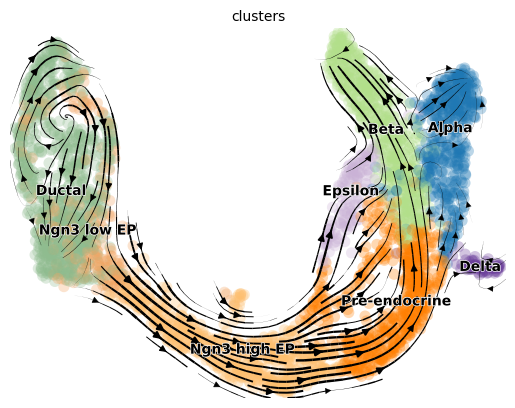

In [9]:
scv.pl.velocity_embedding_stream(test, basis="umap", color="clusters", save="velocityEmbedding.pdf")

computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


/opt/homebrew/lib/python3.10/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


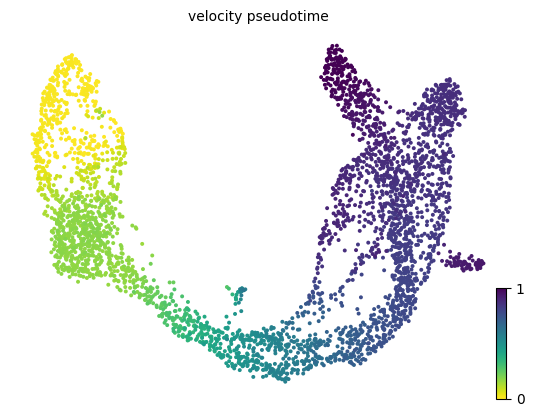

In [7]:
scv.tl.velocity_pseudotime(test)
scv.pl.scatter(test, color="velocity_pseudotime")

In [8]:
scv.tl.recover_dynamics(test, n_jobs=20)
scv.tl.velocity(test, mode = "dynamical")
scv.tl.velocity_graph(test)

recovering dynamics (using 8/8 cores)


  0%|          | 0/2290 [00:00<?, ?gene/s]

KeyboardInterrupt: 

In [ ]:
scv.pl.velocity_embedding_stream(test, basis="umap", color = "clusters")

In [ ]:
scv.tl.latent_time(test)
scv.pl.scatter(test, color="latent_time", color_map="gnuplot", size=80)